In [1]:
import pandas as pd 
import numpy as np 
import nltk 
import re
import string
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn import tree

from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import collections, numpy

In [3]:
df= pd.read_csv('Twitter_Emotion_Dataset.csv') 

In [4]:
print("Missing dataset value in all : ",df.isnull().values.any())

Missing dataset value in all :  False


In [5]:
df.head()

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


In [6]:
df['tweet'][2489]

'Ga pernah dipaksa sih buat berkerudung. Tapi dari SD udah keinginan sendiri juga. Tapi sayang kata mama, waktu itu kelas 4, bentar lagi lulus drpd beli baju lagi.'

In [7]:
df.shape

(4401, 2)

In [8]:
print('Jumlah kolom pada dataset:  ', len(df.columns))
print('Jumlah baris pada dataset:  ', len(df))

Jumlah kolom pada dataset:   2
Jumlah baris pada dataset:   4401


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


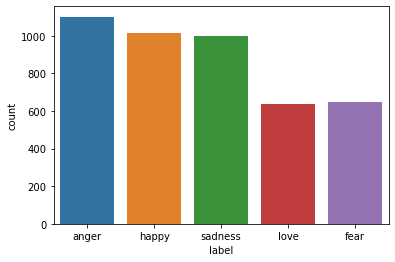

In [9]:
sns.countplot(df['label'],label="Count") #Grafik pada kolom label
plt.show() 

In [10]:
collections.Counter(df['label'])

Counter({'anger': 1101,
         'happy': 1017,
         'sadness': 997,
         'love': 637,
         'fear': 649})

In [11]:
def case_folding(tweet):  
    tweet = tweet.lower()
    
    return tweet
df['tweet']= df['tweet'].apply(case_folding)  

In [12]:
df.head()

,label,tweet
0,anger,"soal jln jatibaru,polisi tdk bs gertak gubernu..."
1,anger,"sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,kepingin gudeg mbarek bu hj. amad foto dari go...
3,anger,"jln jatibaru,bagian dari wilayah tn abang.peng..."
4,happy,"sharing pengalaman aja, kemarin jam 18.00 bata..."


In [13]:
df['tweet'][2489]

'ga pernah dipaksa sih buat berkerudung. tapi dari sd udah keinginan sendiri juga. tapi sayang kata mama, waktu itu kelas 4, bentar lagi lulus drpd beli baju lagi.'

In [14]:
def clean_tweet(tweet):
    
    # remove special characters 
    tweet = re.sub('[^ a-zA-Z0-9]', ' ', tweet)
    
    # remove number
    tweet = re.sub(r'[0-9]+', '', tweet)
    
    #remove url 
    tweet = re.sub("url", "", tweet)
    
    #remove username 
    tweet = re.sub('username', '', tweet)
    
    #remove sensitiveno
    tweet = re.sub('sensitiveno', '', tweet)
    
    #remove URL 
    tweet = re.sub("https", "", tweet)
    
    # remove askfm
    tweet = re.sub('askfm', '', tweet)
    
    #remove double spasi
    tweet= " ".join(tweet.split())    
    return tweet
df['tweet']= df['tweet'].apply(clean_tweet)

In [15]:
df['tweet'][2489]

'ga pernah dipaksa sih buat berkerudung tapi dari sd udah keinginan sendiri juga tapi sayang kata mama waktu itu kelas bentar lagi lulus drpd beli baju lagi'

In [16]:
key_norm = pd.read_csv('kamus_normalisasi.csv')

def normalisasi(tweet):
    tweet = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] 
                      if (key_norm["singkat"] == word).any() else word for word in tweet.split()])
    return tweet
df['tweet']= df['tweet'].apply(normalisasi)

In [17]:
df['tweet'][2489]

'tidak pernah dipaksa sih buat berkerudung tapi dari sd sudah keinginan sendiri juga tapi sayang kata mama waktu itu kelas bentar lagi lulus drpd beli baju lagi'

In [18]:
text = df['tweet'].values
y = df['label'].values

In [19]:
text.shape

(4401,)

# Bag of Word

In [20]:
# bag of words
bow = CountVectorizer()
X_bow = bow.fit_transform(text)

In [21]:
counter = Counter(y)
print('Before',counter)

smt = SMOTE(random_state=1)
X_bow_sm, y_bow_sm = smt.fit_resample(X_bow, y)

counter = Counter(y_bow_sm)
print('After',counter)

Before Counter({'anger': 1101, 'happy': 1017, 'sadness': 997, 'fear': 649, 'love': 637})
After Counter({'anger': 1101, 'happy': 1101, 'sadness': 1101, 'love': 1101, 'fear': 1101})


In [22]:
df1 = pd.DataFrame({'Kelas Emosi': y_bow_sm,
                   'values1': X_bow_sm
                  })

In [23]:
df1.head

<bound method NDFrame.head of      Kelas Emosi                                            values1
0          anger    (0, 14723)\t2\n  (0, 6186)\t1\n  (0, 6262)\t...
1          anger    (0, 14723)\t2\n  (0, 6186)\t1\n  (0, 6262)\t...
2          happy    (0, 14723)\t2\n  (0, 6186)\t1\n  (0, 6262)\t...
3          anger    (0, 14723)\t2\n  (0, 6186)\t1\n  (0, 6262)\t...
4          happy    (0, 14723)\t2\n  (0, 6186)\t1\n  (0, 6262)\t...
...          ...                                                ...
5500     sadness    (0, 14723)\t2\n  (0, 6186)\t1\n  (0, 6262)\t...
5501     sadness    (0, 14723)\t2\n  (0, 6186)\t1\n  (0, 6262)\t...
5502     sadness    (0, 14723)\t2\n  (0, 6186)\t1\n  (0, 6262)\t...
5503     sadness    (0, 14723)\t2\n  (0, 6186)\t1\n  (0, 6262)\t...
5504     sadness    (0, 14723)\t2\n  (0, 6186)\t1\n  (0, 6262)\t...

[5505 rows x 2 columns]>

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


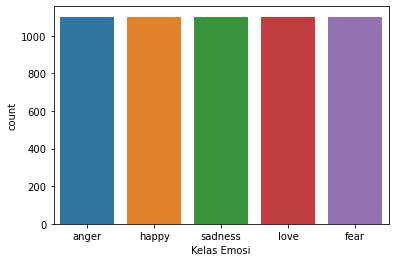

In [24]:
sns.countplot(df1['Kelas Emosi']) #Grafik pada kolom label
plt.show() 

In [25]:
y_bow_sm.shape

(5505,)

In [26]:
X_train_bow,X_test_bow,y_train_bow,y_test_bow= train_test_split(X_bow_sm, y_bow_sm,
                                                                                test_size=0.1,random_state=22,
                                                                                stratify=y_bow_sm)

In [27]:
counter = Counter(y_train_bow)
print('Jumlah',counter)

Jumlah Counter({'anger': 991, 'love': 991, 'fear': 991, 'happy': 991, 'sadness': 990})


In [28]:
counter = Counter(y_test_bow)
print('Jumlah',counter)

Jumlah Counter({'sadness': 111, 'love': 110, 'happy': 110, 'anger': 110, 'fear': 110})


In [29]:
print(X_train_bow.shape)
print(X_test_bow.shape)
print(y_train_bow.shape)
print(y_test_bow.shape)

(4954, 17065)
(551, 17065)
(4954,)
(551,)


In [30]:
#Multinomial Naive Bayes dengan bag of word menggunakan SMOTE
params = {
            'alpha': [0.01, 0.1, 0.5, 1.1, 1.5, 5.0, 5.5]
         }
grid_search_cv = GridSearchCV(MultinomialNB(), params, cv= 10, verbose=3)

grid_search_cv.fit(X_train_bow, y_train_bow)

#Printing the best hyperparameters
print('The best hyper parameters are: \n',grid_search_cv.best_params_)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV 1/10] END .......................alpha=0.01;, score=0.597 total time=   0.0s
[CV 2/10] END .......................alpha=0.01;, score=0.611 total time=   0.0s
[CV 3/10] END .......................alpha=0.01;, score=0.591 total time=   0.0s
[CV 4/10] END .......................alpha=0.01;, score=0.619 total time=   0.0s
[CV 5/10] END .......................alpha=0.01;, score=0.644 total time=   0.0s
[CV 6/10] END .......................alpha=0.01;, score=0.580 total time=   0.0s
[CV 7/10] END .......................alpha=0.01;, score=0.636 total time=   0.0s
[CV 8/10] END .......................alpha=0.01;, score=0.596 total time=   0.0s
[CV 9/10] END .......................alpha=0.01;, score=0.600 total time=   0.0s
[CV 10/10] END ......................alpha=0.01;, score=0.612 total time=   0.0s
[CV 1/10] END ........................alpha=0.1;, score=0.613 total time=   0.0s
[CV 2/10] END ........................alpha=0.1;

In [31]:
print(' \n',grid_search_cv.multimetric_)

 
 False


# Multinomial Naive Bayes

In [32]:
mnb7 = MultinomialNB(alpha=1.1)
mnb7.fit(X_train_bow, y_train_bow) 

MultinomialNB(alpha=1.1)

In [33]:
mnb7

MultinomialNB(alpha=1.1)

In [34]:
# Pengujian data train dengan 10-Fold CV
scores = cross_val_score(mnb7,X_train_bow, y_train_bow, cv=10)
print("Multinomial Naive Bayes(BOW) KFold Train Accuracy",scores.mean())

Multinomial Naive Bayes(BOW) KFold Train Accuracy 0.646550586510264


In [35]:
# Evaluasi training tiap skenario dengan 10-Fold CV
scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
score1 = cross_validate(mnb7, X_train_bow, y_train_bow, cv=10, scoring=scoring)
print("training")
print(" %0.4f"% score1['test_accuracy'].mean())
print(" %0.4f"% score1['test_precision_macro'].mean())
print(" %0.4f"% score1['test_recall_macro'].mean())
print(" %0.4f"% score1['test_f1_macro'].mean())

training
 0.6466
 0.6599
 0.6466
 0.6457


In [36]:
# Evaluasi testing tiap skenario dengan confusion matrix 
pred7 = mnb7.predict(X_test_bow)
print("Classification: \n",confusion_matrix(y_test_bow, pred7))
accuracy = accuracy_score(y_test_bow, pred7)
print(' {:.2f}%'.format(accuracy * 100))
precision = precision_score(y_test_bow, pred7, average='macro')
print(' {:.2f}%'.format(precision * 100))
recall = recall_score(y_test_bow, pred7, average='macro')
print(' {:.2f}%'.format(recall * 100))
f1 = f1_score(y_test_bow, pred7, average='macro')
print(' {:.2f}%'.format(f1 * 100))

Classification: 
 [[81  5  6  0 18]
 [17 79  3  5  6]
 [12  6 59 10 23]
 [ 7  7  2 86  8]
 [19  6  8  7 71]]
 68.24%
 69.58%
 68.25%
 68.32%


In [37]:
print("Classification Report: \n",classification_report(y_test_bow, pred7))

Classification Report: 
               precision    recall  f1-score   support

       anger       0.60      0.74      0.66       110
        fear       0.77      0.72      0.74       110
       happy       0.76      0.54      0.63       110
        love       0.80      0.78      0.79       110
     sadness       0.56      0.64      0.60       111

    accuracy                           0.68       551
   macro avg       0.70      0.68      0.68       551
weighted avg       0.70      0.68      0.68       551



(5.5, -0.5)

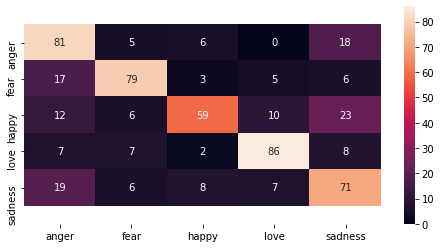

In [38]:
cm = confusion_matrix(y_test_bow, pred7)  
index = ['anger','fear','happy','love','sadness']  
columns = ['anger','fear','happy','love','sadness']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(8,4))  
ax = sns.heatmap(cm_df, annot=True, fmt="g")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Bigram

In [39]:
bigram = CountVectorizer(ngram_range=(2,2),analyzer='word') #bigram
X_bigram = bigram.fit_transform(text)

In [40]:
X_bigram.shape

(4401, 83525)

In [41]:
counter_bigram = Counter(y)
print('Before',counter_bigram)
# oversampling the train dataset using SMOTE
smt = SMOTE(random_state=1)
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_bigram_sm, y_bigram_sm = smt.fit_resample(X_bigram, y)

counter_bigram = Counter(y_bigram_sm)
print('After',counter_bigram)

Before Counter({'anger': 1101, 'happy': 1017, 'sadness': 997, 'fear': 649, 'love': 637})
After Counter({'anger': 1101, 'happy': 1101, 'sadness': 1101, 'love': 1101, 'fear': 1101})


In [42]:
X_train_bigram,X_test_bigram,y_train_bigram,y_test_bigram= train_test_split(X_bigram_sm, y_bigram_sm,test_size=0.1,random_state=22,stratify=y_bigram_sm)

In [43]:
X_bigram_sm

<5505x83525 sparse matrix of type '<class 'numpy.int64'>'
	with 153839 stored elements in Compressed Sparse Row format>

In [44]:
print(X_train_bigram.shape)
print(X_test_bigram.shape)
print(y_train_bigram.shape)
print(y_test_bigram.shape)

(4954, 83525)
(551, 83525)
(4954,)
(551,)


In [45]:
counter = Counter(y_train_bigram)
print('Jumlah',counter)

Jumlah Counter({'anger': 991, 'love': 991, 'fear': 991, 'happy': 991, 'sadness': 990})


In [46]:
print("Vocabulary size: {}".format(len(bigram.vocabulary_)))
print("Vocabulary content: {}".format(bigram.vocabulary_))

Vocabulary size: 83525
Vocabulary content: {'soal jalan': 71035, 'jalan jatibaru': 30845, 'jatibaru polisi': 31355, 'polisi tidak': 59804, 'tidak bisa': 77248, 'bisa gertak': 11594, 'gertak gubernur': 24445, 'gubernur memang': 24952, 'memang nya': 46819, 'nya polisi': 53912, 'tidak ikut': 77367, 'ikut pembahasan': 27846, 'pembahasan jangan': 57458, 'jangan berpolitik': 31073, 'berpolitik pengaturan': 9982, 'pengaturan wilayah': 57829, 'wilayah hak': 81266, 'hak gubernur': 25396, 'gubernur persoalan': 24954, 'persoalan tanah': 58989, 'tanah abang': 73890, 'abang soal': 42, 'soal turun': 71062, 'turun temurun': 79208, 'temurun pelik': 75157, 'pelik perlu': 57377, 'perlu kesabaran': 58644, 'sesama cewek': 69414, 'cewek loh': 14191, 'loh sepertinya': 42838, 'sepertinya harusnya': 69039, 'harusnya bisa': 26394, 'bisa lebih': 11653, 'lebih rasain': 42099, 'rasain lah': 61420, 'lah yang': 40986, 'yang harus': 82425, 'harus sibuk': 26370, 'sibuk jaga': 70261, 'jaga diri': 30689, 'diri rasain':

In [47]:
#Multinomial Naive Bayes dengan bigram menggunakan SMOTE
params = {
            'alpha': [0.01, 0.1, 0.5, 1.1, 1.5, 5.0, 5.5]
         }
grid_search_cv = GridSearchCV(MultinomialNB(), params, cv= 10, verbose=3)

grid_search_cv.fit(X_train_bigram, y_train_bigram)

#Printing the best hyperparameters
print('The best hyper parameters are: \n',grid_search_cv.best_params_)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV 1/10] END .......................alpha=0.01;, score=0.462 total time=   0.0s
[CV 2/10] END .......................alpha=0.01;, score=0.391 total time=   0.0s
[CV 3/10] END .......................alpha=0.01;, score=0.381 total time=   0.0s
[CV 4/10] END .......................alpha=0.01;, score=0.383 total time=   0.0s
[CV 5/10] END .......................alpha=0.01;, score=0.352 total time=   0.0s
[CV 6/10] END .......................alpha=0.01;, score=0.402 total time=   0.0s
[CV 7/10] END .......................alpha=0.01;, score=0.392 total time=   0.0s
[CV 8/10] END .......................alpha=0.01;, score=0.388 total time=   0.0s
[CV 9/10] END .......................alpha=0.01;, score=0.362 total time=   0.0s
[CV 10/10] END ......................alpha=0.01;, score=0.327 total time=   0.0s
[CV 1/10] END ........................alpha=0.1;, score=0.450 total time=   0.0s
[CV 2/10] END ........................alpha=0.1;

# Multinomial Naive Bayes

In [48]:
mnb8 = MultinomialNB(alpha=5.0)
mnb8.fit(X_train_bigram, y_train_bigram) 

MultinomialNB(alpha=5.0)

In [49]:
# Evaluasi training tiap skenario dengan 10-Fold CV
scores3 = cross_val_score(mnb8,X_train_bigram, y_train_bigram, cv=10)
print("Multinomial Naive Bayes (Bigram) KFold Train Accuracy",scores3.mean())

Multinomial Naive Bayes (Bigram) KFold Train Accuracy 0.43236151840990555


In [50]:
# Evaluasi training tiap skenario dengan 10-Fold CV
scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
score2 = cross_validate(mnb8, X_train_bigram, y_train_bigram, cv=10, scoring=scoring)
print("training")
print(" %0.4f"% score2['test_accuracy'].mean())
print(" %0.4f"% score2['test_precision_macro'].mean())
print(" %0.4f"% score2['test_recall_macro'].mean())
print(" %0.4f"% score2['test_f1_macro'].mean())

training
 0.4324
 0.4634
 0.4324
 0.4310


In [51]:
pred8 = mnb8.predict(X_test_bigram) # prediksi oleh model
print(" %0.4f" % accuracy_score(y_test_bigram, pred8))
print(" %0.4f" % precision_score(y_test_bigram, pred8, average='macro'))
print(" %0.4f" % recall_score(y_test_bigram, pred8, average='macro'))
print(" %0.4f" % f1_score(y_test_bigram, pred8, average='macro'))
print(confusion_matrix(y_test_bigram, pred8))

 0.4809
 0.5181
 0.4811
 0.4835
[[56 13  4 18 19]
 [34 56  6  5  9]
 [18 11 40 22 19]
 [31  1  3 67  8]
 [25 13  4 23 46]]


In [52]:
print("Classification Report: \n",classification_report(y_test_bigram, pred8))

Classification Report: 
               precision    recall  f1-score   support

       anger       0.34      0.51      0.41       110
        fear       0.60      0.51      0.55       110
       happy       0.70      0.36      0.48       110
        love       0.50      0.61      0.55       110
     sadness       0.46      0.41      0.43       111

    accuracy                           0.48       551
   macro avg       0.52      0.48      0.48       551
weighted avg       0.52      0.48      0.48       551



(5.5, -0.5)

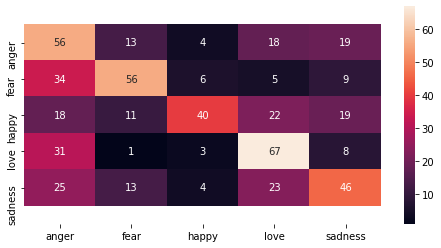

In [53]:
cm = confusion_matrix(y_test_bigram, pred8)  
index = ['anger','fear','happy','love','sadness']  
columns = ['anger','fear','happy','love','sadness']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(8,4))  
ax = sns.heatmap(cm_df, annot=True, fmt="g")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Trigram

In [54]:
trigram = CountVectorizer(ngram_range=(3,3),analyzer='word') #trigram
X_trigram = trigram.fit_transform(text)

In [55]:
counter_trigram = Counter(y)
print('Before',counter_trigram)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_trigram_sm, y_trigram_sm = smt.fit_resample(X_trigram, y.ravel())

counter_trigram = Counter(y_trigram_sm)
print('After',counter_trigram)

Before Counter({'anger': 1101, 'happy': 1017, 'sadness': 997, 'fear': 649, 'love': 637})
After Counter({'anger': 1101, 'happy': 1101, 'sadness': 1101, 'love': 1101, 'fear': 1101})


In [56]:
X_trigram_sm.shape

(5505, 109592)

In [57]:
X_train_trigram,X_test_trigram,y_train_trigram,y_test_trigram= train_test_split(X_trigram_sm, y_trigram_sm,test_size=0.1,random_state=22,stratify=y_trigram_sm)

In [58]:
print(X_train_trigram.shape)
print(X_test_trigram.shape)
print(y_train_trigram.shape)
print(y_test_trigram.shape)

(4954, 109592)
(551, 109592)
(4954,)
(551,)


In [59]:
counter = Counter(y_train_trigram)
print('Jumlah',counter)

Jumlah Counter({'anger': 991, 'love': 991, 'fear': 991, 'happy': 991, 'sadness': 990})


In [60]:
#Multinomial Naive Bayes dengan menggunakan SMOTE
params = {
            'alpha': [0.01, 0.1, 0.5, 1.1, 1.5, 5.0]
         }
grid_search_cv = GridSearchCV(MultinomialNB(), params, verbose=3)

grid_search_cv.fit(X_train_trigram, y_train_trigram)

#Printing the best hyperparameters
print('The best hyper parameters are: \n',grid_search_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ........................alpha=0.01;, score=0.270 total time=   0.0s
[CV 2/5] END ........................alpha=0.01;, score=0.190 total time=   0.0s
[CV 3/5] END ........................alpha=0.01;, score=0.193 total time=   0.0s
[CV 4/5] END ........................alpha=0.01;, score=0.203 total time=   0.0s
[CV 5/5] END ........................alpha=0.01;, score=0.183 total time=   0.0s
[CV 1/5] END .........................alpha=0.1;, score=0.268 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;, score=0.185 total time=   0.0s
[CV 3/5] END .........................alpha=0.1;, score=0.190 total time=   0.0s
[CV 4/5] END .........................alpha=0.1;, score=0.199 total time=   0.0s
[CV 5/5] END .........................alpha=0.1;, score=0.180 total time=   0.0s
[CV 1/5] END .........................alpha=0.5;, score=0.280 total time=   0.0s
[CV 2/5] END .........................alpha=0.5;,

# Multinomial Naive Bayes

In [61]:
mnb3 = MultinomialNB(alpha=5.0)
mnb3.fit(X_train_trigram, y_train_trigram) # melatih model

MultinomialNB(alpha=5.0)

In [62]:
# Evaluasi training tiap skenario dengan 10-Fold CV
scores5 = cross_val_score(mnb3, X_train_trigram, y_train_trigram, cv=10)
print("Multinomial Naive Bayes (Trigram) KFold Train Accuracy",scores5.mean())

Multinomial Naive Bayes (Trigram) KFold Train Accuracy 0.22667766373411533


In [63]:
# Evaluasi training tiap skenario dengan 10-Fold CV
scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
score3 = cross_validate(mnb3, X_train_trigram, y_train_trigram, cv=10, scoring=scoring)
print("training")
print(" %0.4f"% score3['test_accuracy'].mean())
print(" %0.4f"% score3['test_precision_macro'].mean())
print(" %0.4f"% score3['test_recall_macro'].mean())
print(" %0.4f"% score3['test_f1_macro'].mean())

training
 0.2267
 0.3788
 0.2267
 0.2112


In [64]:
pred5 = mnb3.predict(X_test_trigram) # prediksi oleh model
print(" %0.4f" % accuracy_score(y_test_trigram, pred5))
print(" %0.4f" % precision_score(y_test_trigram, pred5, average='macro'))
print(" %0.4f" % recall_score(y_test_trigram, pred5, average='macro'))
print(" %0.4f" % f1_score(y_test_trigram, pred5, average='macro'))
print(confusion_matrix(y_test_trigram, pred5))

 0.2178
 0.3587
 0.2181
 0.2017
[[ 6 18  1 83  2]
 [36 27  2 44  1]
 [13  8 17 69  3]
 [41  2  3 62  2]
 [ 7 18  2 76  8]]


In [65]:
print("Classification Report: \n",classification_report(y_test_trigram, pred5))

Classification Report: 
               precision    recall  f1-score   support

       anger       0.06      0.05      0.06       110
        fear       0.37      0.25      0.30       110
       happy       0.68      0.15      0.25       110
        love       0.19      0.56      0.28       110
     sadness       0.50      0.07      0.13       111

    accuracy                           0.22       551
   macro avg       0.36      0.22      0.20       551
weighted avg       0.36      0.22      0.20       551



(5.5, -0.5)

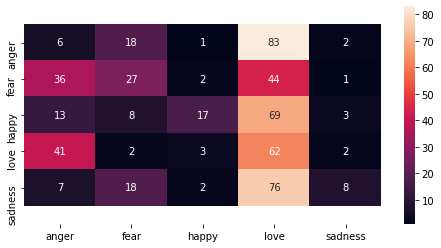

In [66]:
cm = confusion_matrix(y_test_trigram, pred5)  
index = ['anger','fear','happy','love','sadness']  
columns = ['anger','fear','happy','love','sadness']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize=(8,4))  
ax = sns.heatmap(cm_df, annot=True, fmt="g")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [67]:
test_msgs = ["aku cinta kamu"]
test_msg_counts = trigram.transform(test_msgs)

model = mnb3.predict_proba(test_msg_counts)
emotion = mnb3.predict(test_msg_counts)

print("emosi",emotion)
model


emosi ['love']


array([[0.15433281, 0.15715583, 0.1554198 , 0.37805405, 0.15503751]])

# Pickle model 

In [54]:
import joblib

In [69]:
joblib.dump(mnb3,'mnb3_HP_SM.pkl')

['mnb3_HP_SM.pkl']

In [56]:
joblib.dump(mnb8,'mnb2_HP_SM.pkl')

['mnb2_HP_SM.pkl']

In [57]:
joblib.dump(mnb7,'mnb1_HP_SM.pkl')

['mnb1_HP_SM.pkl']

In [55]:
joblib.dump(bow,'bow_SM.pkl')

['bow_SM.pkl']

In [59]:
joblib.dump(bigram,'bigram_SM.pkl')

['bigram_SM.pkl']

In [74]:
joblib.dump(trigram,'trigram_SM.pkl')

['trigram_SM.pkl']

In [75]:
test_msgs = ["takut dan bahagia"]
test_msg_counts = bow.transform(test_msgs)

classifications = mnb1.predict_proba(test_msg_counts)
emotion = mnb1.predict(test_msg_counts)

print("emosi",emotion)
classifications


emosi ['happy']


array([[0.04052032, 0.30112995, 0.38758164, 0.22350417, 0.04726392]])

In [76]:
test_msgs = ["aku cinta kamu"]
test_msg_counts = bigram.transform(test_msgs)

classifications = mnb2.predict_proba(test_msg_counts)
emotion = mnb2.predict(test_msg_counts)

print("emosi",emotion)
classifications


emosi ['love']


array([[0.0217779 , 0.02285742, 0.03193411, 0.8881021 , 0.03532847]])